<a href="https://colab.research.google.com/github/ferditobing/Pemrograman-Python/blob/main/Cnn_car_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset1")
data = []
labels = []

[INFO] loading images...


In [ ]:
for imagePath in imagePaths:
  # load the input image from disk, resize it to 32x32 pixels, scale
  # the pixel intensities to the range [0, 1], and then update our
  # image list
  image = Image.open(imagePath)
  # prepocessing
  image = np.array(image.resize((32, 32))) / 255.0
  data.append(image)
  # extract the class label from the file path and update the
  #label list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
print(labels)

['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',

In [ ]:
# encode the labes, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [ ]:
# perform a training and testing split, using 75% of the data for training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),   np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1784, 32, 32, 3)
(595, 32, 32, 3)


CNN

In [ ]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16,(3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
# fully connected layers
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 100)               5

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
     Flatten(input_shape=(32*32*3,)),
     Dense(100, activation="relu", name="layer1"),
     Dense(16, activation="relu", name="layer2"),
     Dense(16, activation="relu", name="layer3"),
     Dense(3, activation="softmax", name="layer4"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 layer1 (Dense)              (None, 100)               307300    
                                                                 
 layer2 (Dense)              (None, 16)                1616      
                                                                 
 layer3 (Dense)              (None, 16)                272       
                                                                 
 layer4 (Dense)              (None, 3)                 51        
                                                                 
Total params: 309,239
Trainable params: 309,239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 255)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=16)

[INFO] training network...
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


112/112 [==============================] - 2s 10ms/step - loss: 1.0491 - accuracy: 0.5589 - val_loss: 0.6373 - val_accuracy: 0.7445
Epoch 2/25
112/112 [==============================] - 1s 8ms/step - loss: 0.5212 - accuracy: 0.7674 - val_loss: 0.4727 - val_accuracy: 0.7950
Epoch 3/25
112/112 [==============================] - 1s 9ms/step - loss: 0.4520 - accuracy: 0.7932 - val_loss: 0.4498 - val_accuracy: 0.7933
Epoch 4/25
112/112 [==============================] - 1s 13ms/step - loss: 0.4128 - accuracy: 0.8274 - val_loss: 0.3935 - val_accuracy: 0.8471
Epoch 5/25
112/112 [==============================] - 2s 17ms/step - loss: 0.3609 - accuracy: 0.8593 - val_loss: 0.4216 - val_accuracy: 0.8101
Epoch 6/25
112/112 [==============================] - 1s 13ms/step - loss: 0.3342 - accuracy: 0.8672 - val_loss: 0.4087 - val_accuracy: 0.8303
Epoch 7/25
112/112 [==============================] - 1s 9ms/step - loss: 0.3027 - accuracy: 0.8879 - val_loss: 0.3189 - val_accuracy: 0.8874
Epoch 8/25
11

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


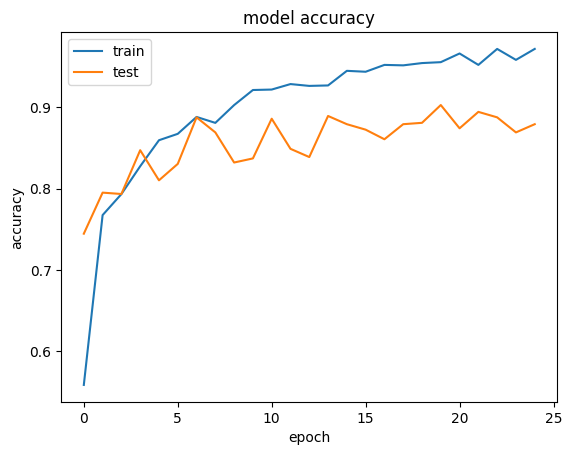

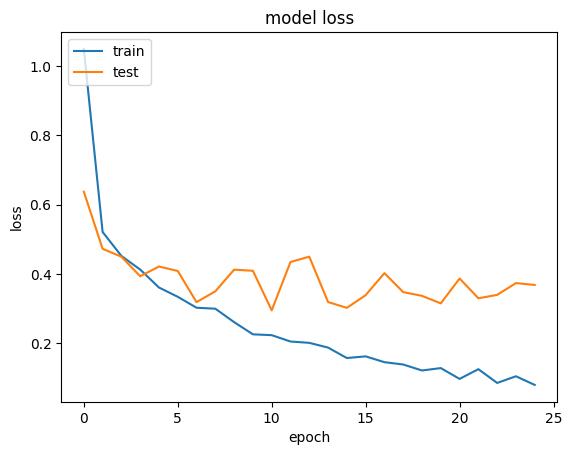

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
19/19 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       163
      silver       0.65      0.80      0.71        89
         tan       0.87      0.71      0.78       106
       white       0.80      0.79      0.80        97
      yellow       0.99      0.99      0.99       140

    accuracy                           0.88       595
   macro avg       0.86      0.86      0.85       595
weighted avg       0.89      0.88      0.88       595



In [ ]:
model1.save('nmodel_scene')

In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='Yellow_05_test.jpg'

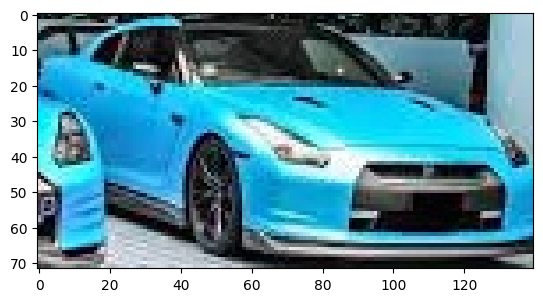

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('Yellow_05_test.jpg')
image_testing = np.array(image_testing.resize((32, 32))) / 255.0
image_testing.shape

(32, 32, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 32, 32, 3)


In [ ]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

1/1 [==============================] - 0s 44ms/step
[[3.7665687e-11 4.5232960e-19 2.4701550e-09 3.0906065e-17 1.0000000e+00]]
['yellow']
